In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as data
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:


stock = "TATAMOTORS.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
2000-01-03,32.728165,41.535931,41.631748,39.744186,39.744186,3528277
2000-01-04,31.437166,39.897491,41.967102,39.475903,41.583839,3544397
2000-01-05,32.199684,40.865227,41.737144,37.176334,37.176334,5849540
2000-01-06,33.535999,42.561157,44.055874,41.200577,41.200577,10274966
2000-01-07,36.223701,45.972179,45.972179,42.752785,42.925255,11477451


In [4]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
2024-10-25,864.299988,864.299988,885.750000,857.299988,883.900024,10873022
2024-10-28,878.450012,878.450012,886.750000,860.200012,867.849976,7106045
2024-10-29,842.750000,842.750000,882.500000,825.700012,880.250000,26818871
2024-10-30,840.200012,840.200012,853.599976,838.049988,846.000000,12933218
2024-10-31,834.049988,834.049988,843.849976,831.849976,843.849976,11904413


In [5]:
df.shape

(6199, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6199 entries, 2000-01-03 to 2024-10-31
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Adj Close, TATAMOTORS.NS)  6199 non-null   float64
 1   (Close, TATAMOTORS.NS)      6199 non-null   float64
 2   (High, TATAMOTORS.NS)       6199 non-null   float64
 3   (Low, TATAMOTORS.NS)        6199 non-null   float64
 4   (Open, TATAMOTORS.NS)       6199 non-null   float64
 5   (Volume, TATAMOTORS.NS)     6199 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 339.0 KB


In [7]:
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,TATAMOTORS.NS,0
Close,TATAMOTORS.NS,0
High,TATAMOTORS.NS,0
Low,TATAMOTORS.NS,0
Open,TATAMOTORS.NS,0
Volume,TATAMOTORS.NS,0


In [8]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
count,6199.000000,6199.000000,6199.000000,6199.000000,6199.000000,6.199000e+03
mean,241.771128,248.249568,252.182080,244.607942,248.670678,1.639122e+07
std,216.150395,214.006912,216.602933,211.672057,214.466986,2.126241e+07
min,9.043227,11.267879,11.631977,11.028340,11.114574,0.000000e+00
25%,74.354824,84.295406,86.021069,82.693398,84.504547,6.059958e+06
50%,169.894577,175.949997,179.750000,173.100006,176.500000,1.006350e+07
75%,385.476822,388.175003,394.199997,383.021011,388.889709,1.805242e+07
max,1161.849976,1161.849976,1179.000000,1145.300049,1167.000000,3.905778e+08


In [9]:
df = df.reset_index()

In [10]:
df.columns

MultiIndex([(     'Date',              ''),
            ('Adj Close', 'TATAMOTORS.NS'),
            (    'Close', 'TATAMOTORS.NS'),
            (     'High', 'TATAMOTORS.NS'),
            (      'Low', 'TATAMOTORS.NS'),
            (     'Open', 'TATAMOTORS.NS'),
            (   'Volume', 'TATAMOTORS.NS')],
           names=['Price', 'Ticker'])

In [11]:
df.to_csv("tatamotors.csv", index = False)

In [12]:
data01 = pd.read_csv("tatamotors.csv")

In [13]:
data01.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
1,2000-01-03,32.72816467285156,41.53593063354492,41.63174819946289,39.74418640136719,39.74418640136719,3528277
2,2000-01-04,31.437166213989258,39.897491455078125,41.96710205078125,39.47590255737305,41.583839416503906,3544397
3,2000-01-05,32.199684143066406,40.86522674560547,41.737144470214844,37.176334381103516,37.176334381103516,5849540
4,2000-01-06,33.5359992980957,42.5611572265625,44.05587387084961,41.20057678222656,41.20057678222656,10274966


In [14]:
# Candlesticks
fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                    high = data01['High'],
                                    low = data01['Low'],
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [15]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

<ipython-input-15-8e9e58ec18af>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [16]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,41.535931,41.631748,39.744186,39.744186,3528277
1,39.897491,41.967102,39.475903,41.583839,3544397
2,40.865227,41.737144,37.176334,37.176334,5849540
3,42.561157,44.055874,41.200577,41.200577,10274966
4,45.972179,45.972179,42.752785,42.925255,11477451


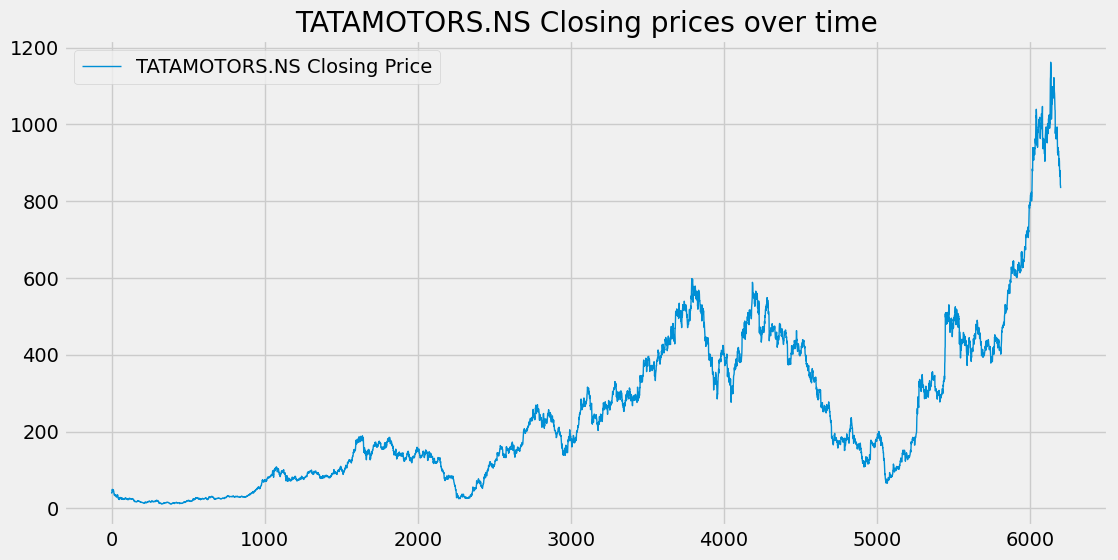

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

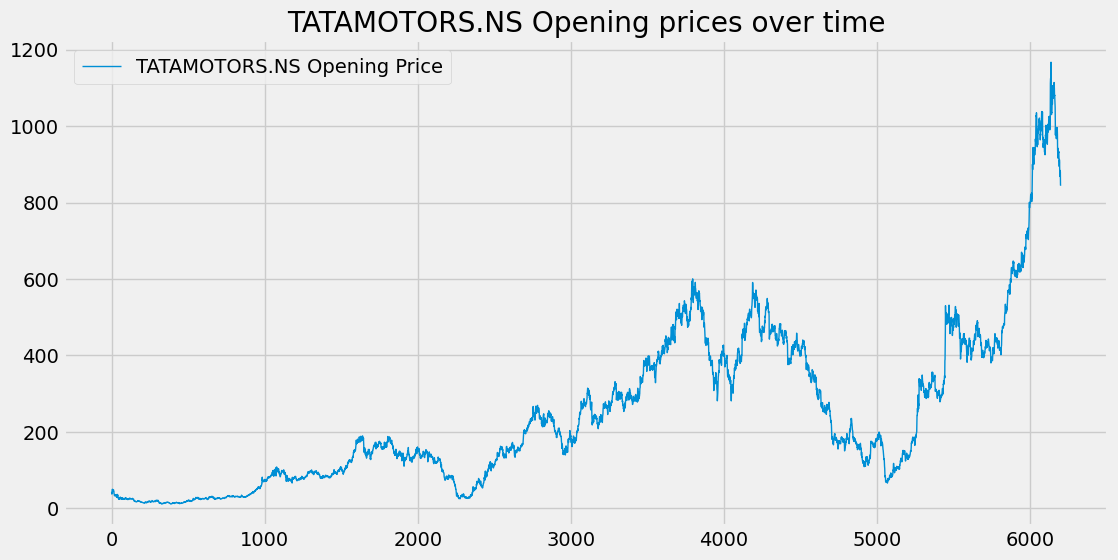

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

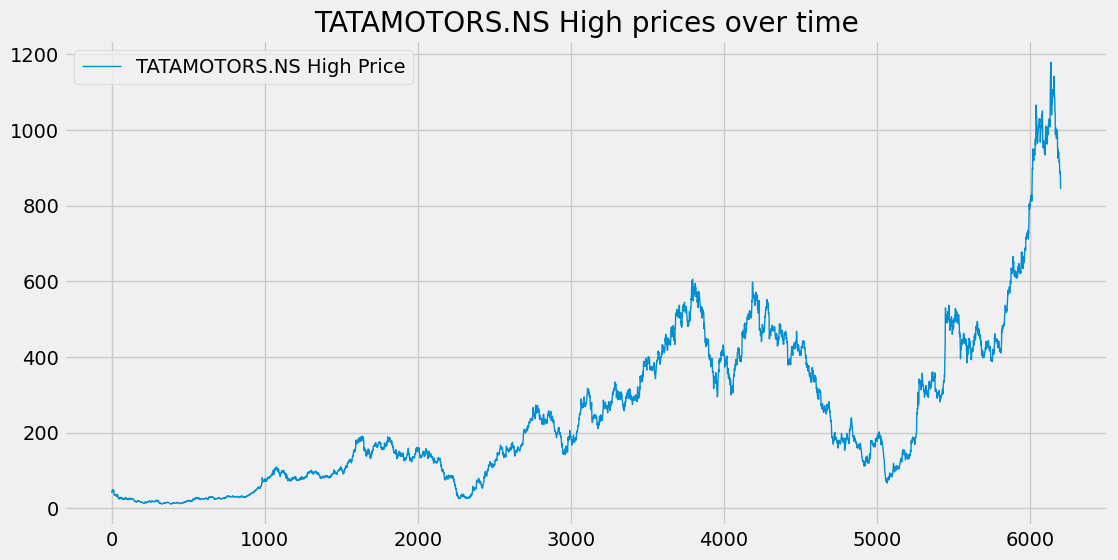

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

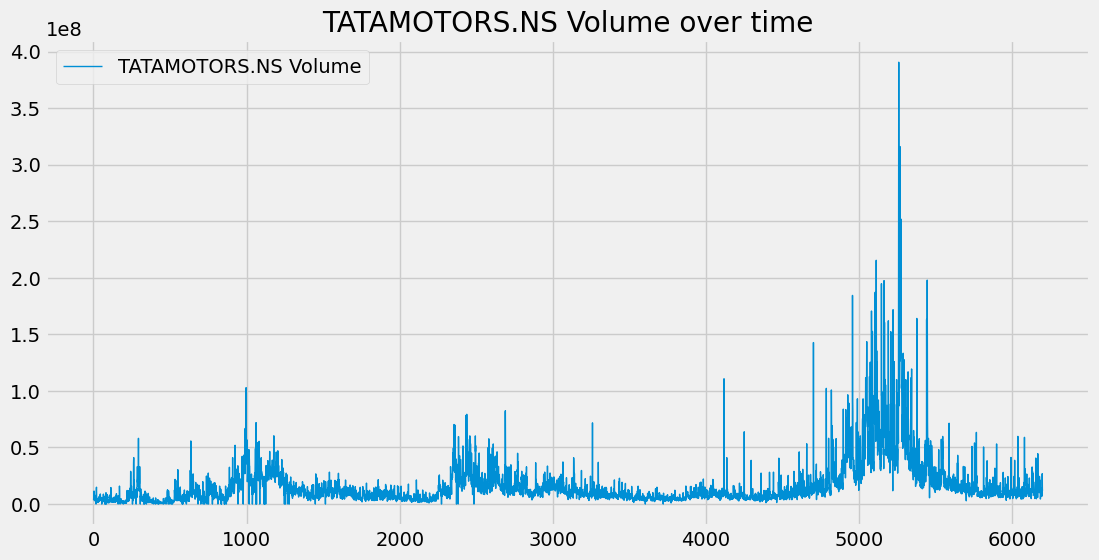

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 1)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

## Trying moving avarage

In [21]:
ma100 = df['Close'].rolling(100).mean()

In [22]:
ma100

Ticker,TATAMOTORS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6194,1003.157999
6195,1002.903499
6196,1002.031499
6197,1001.050999


In [23]:
ma200 = df.Close.rolling(200).mean()

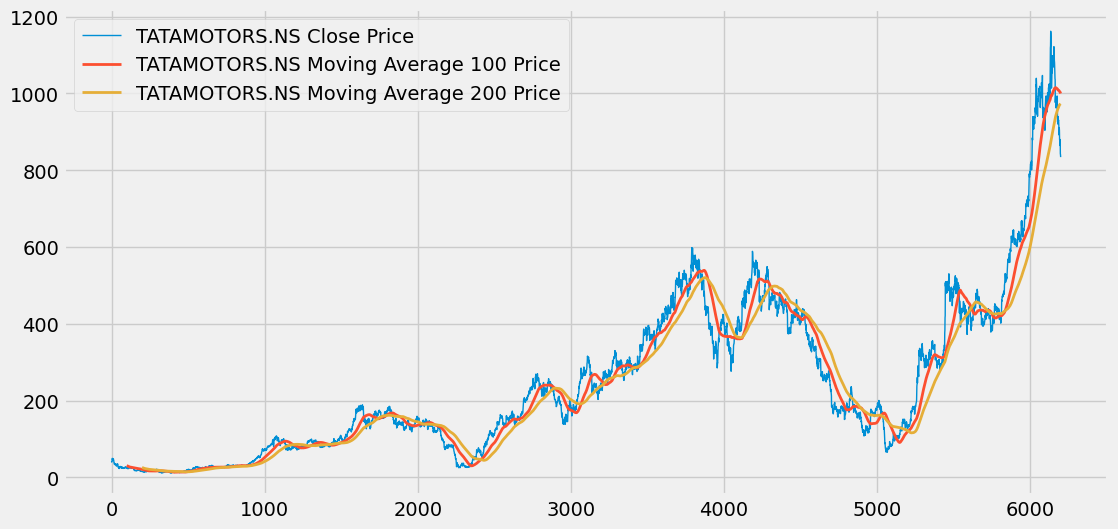

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 2)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 2)
plt.legend()
plt.show()

## It seems the red line is quite accurate.But not satisfactory. lets try exponential moving avarage

In [25]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [26]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

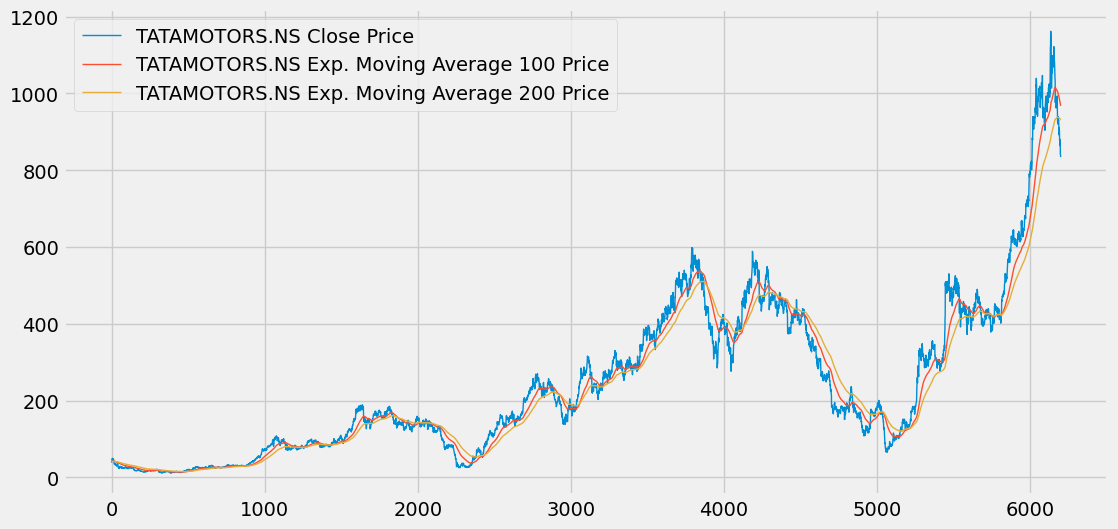

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

# Such process we can see past records, can not get future prediction. so to get future prediction, we should use LSTM.
# Lets try LSTM

In [28]:
# train test split
data_training,data_testing = train_test_split(df['Close'], test_size=0.3, train_size=0.7, random_state=42, shuffle=False)

In [29]:
data_training.shape

(4339, 1)

In [30]:
data_testing.shape

(1860, 1)

In [31]:
# Defining scalar
scaler = MinMaxScaler(feature_range = (0, 1))

In [32]:
# applying scaling to traing data
data_training_array = scaler.fit_transform(data_training)

In [33]:
data_training_array

array([[0.0515757 ],
       [0.04878386],
       [0.05043284],
       ...,
       [0.73574159],
       [0.7372752 ],
       [0.73156691]])

In [34]:
data_training_array.shape

(4339, 1)

In [35]:
data_training_array.shape[0]

4339

In [36]:
# Initialize empty lists to hold input sequences (X) and target values (Y)
x_train = []
y_train = []

# Loop through the training data, starting from the 100th element
# (This ensures there are at least 100 previous data points to use as input)
for i in range(100, data_training_array.shape[0]):
    # Append the previous 100 data points (from i-100 to i-1) as a single input sequence
    x_train.append(data_training_array[i-100:i])
    # Append the value at the current position `i` as the target output
    y_train.append(data_training_array[i, 0])

# Convert the lists into NumPy arrays for easier processing in machine learning models
x_train, y_train = np.array(x_train), np.array(y_train)


In [37]:
x_train.shape

(4239, 100, 1)

In [38]:
# Model Building
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - loss: 0.0487
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0059
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0047
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0042
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0044
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0044
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0039
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0034
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0035
Epoch 10/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 0.0033
Epoch 11/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.0032
Epoch 12/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0027
Epoch 13/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0027
Epoch 14/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0031
Epoch 15/50
133/133 ━━━━━━━━━━━━━━━━━

In [41]:
past_100_days = data_training.tail(100)

In [42]:
final_df = pd.concat([past_100_days,data_testing], ignore_index=True)

In [43]:
final_df.head()

Ticker,TATAMOTORS.NS
0,454.700012
1,459.850006
2,459.299988
3,448.200012
4,432.899994


In [44]:
input_data = scaler.fit_transform(final_df)

In [45]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [46]:
x_test.shape

(1860, 100, 1)

In [47]:
y_predicted = model.predict(x_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step


In [48]:
y_predicted.shape

(1860, 1)

In [49]:
scaler.scale_

array([0.00091195])

In [50]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

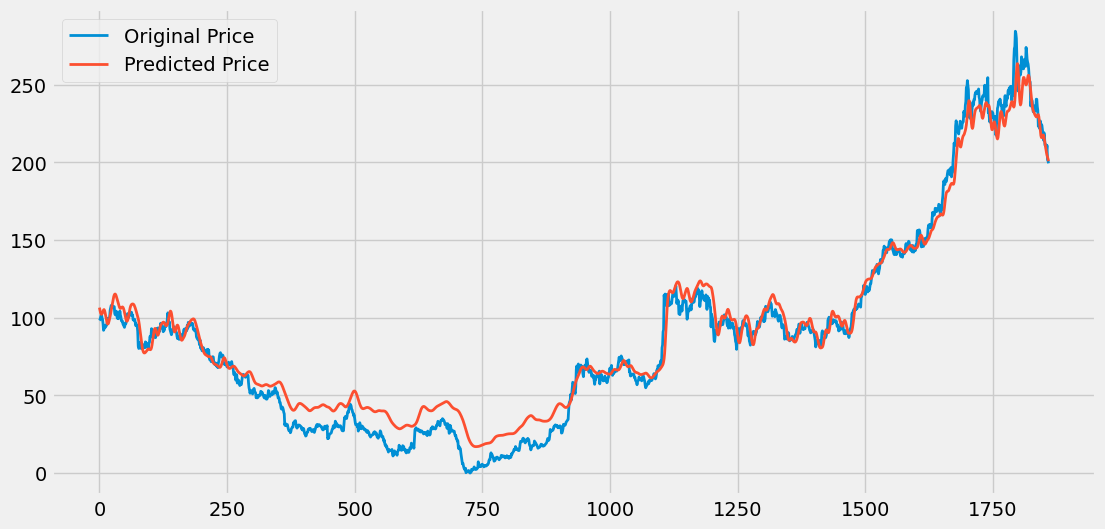

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 2)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 2)
plt.legend()
plt.show()

In [52]:
model.save('stock_dl_model.keras')